In [19]:
'''A1Linear regression by using Deep Neural network: Implement Boston housing price
prediction problem by Linear regression using Deep Neural network. Use Boston House price
predictiondataset'''
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

In [20]:
df=pd.read_csv("housingdata.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [21]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [22]:
df.mean()

CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64

In [23]:
df.fillna(df.mean(),inplace=True)

In [24]:
x = df.drop('MEDV',axis=1)
y=df['MEDV']

In [25]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)
print("shape of scaled x train:",x_train_scaled.shape)
print("shape of scaled x test:",x_test_scaled.shape)

shape of scaled x train: (354, 13)
shape of scaled x test: (152, 13)


In [27]:
x_train_scaled[0]

array([3.45397791e-04, 2.00000000e-01, 1.05205279e-01, 0.00000000e+00,
       1.19135802e-01, 6.38626080e-01, 6.75782889e-01, 3.74205458e-01,
       1.73913043e-01, 5.53435115e-02, 2.44680851e-01, 9.88158629e-01,
       7.61551626e-02])

In [28]:
x_train_scaled[0].shape

(13,)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def house_price_prediction():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(x_train_scaled[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,loss='mse',metrics=['mae'])
    return model

In [30]:
model= house_price_prediction()
history=model.fit(x=x_train_scaled,y=y_train,batch_size=1,verbose=1,epochs=30,validation_data=(x_test_scaled,y_test))

Epoch 1/30


C:\Users\MAIZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 299.6664 - mae: 13.1555 - val_loss: 31.5208 - val_mae: 3.8442
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33.6755 - mae: 4.2563 - val_loss: 26.1880 - val_mae: 3.7841
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.9657 - mae: 3.5643 - val_loss: 20.8657 - val_mae: 3.2474
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.6969 - mae: 3.5695 - val_loss: 21.1855 - val_mae: 3.4926
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.3758 - mae: 3.5236 - val_loss: 18.0528 - val_mae: 3.0237
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.1981 - mae: 3.2049 - val_loss: 22.8736 - val_mae: 3.1392
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.6079 - mae: 2.8502 - val_loss: 29.5079 - val_mae: 3.6691
Epoch 8/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.7272 - mae: 2.8098 - val_loss: 24.2817 - val_mae: 3.2219
Epoch 9/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [31]:
test_input = np.array([[0.00154995, 0.0, 0.28962963, 0.0, 0.27777778, 0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542, 0.88297872, 0.99665297, 0.16851064]])
print("predicted output:",model.predict(test_input))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
predicted output: [[22.691761]]


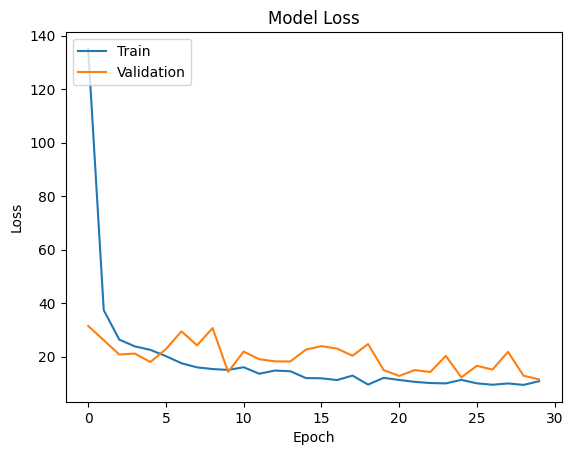

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Text(0, 0.5, 'MEDV')

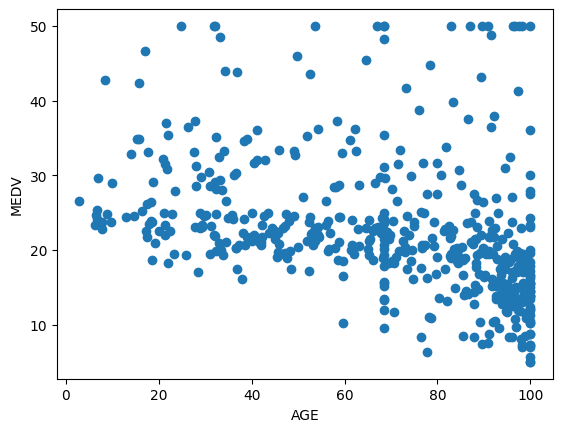

In [33]:
plt.scatter('AGE','MEDV',data=df)
plt.xlabel('AGE')
plt.ylabel('MEDV')

<Axes: xlabel='MEDV', ylabel='Count'>

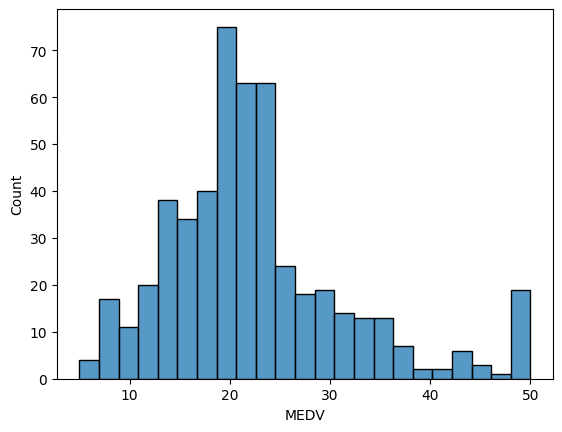

In [34]:
sns.histplot(df['MEDV'])

Text(0, 0.5, 'MEDV')

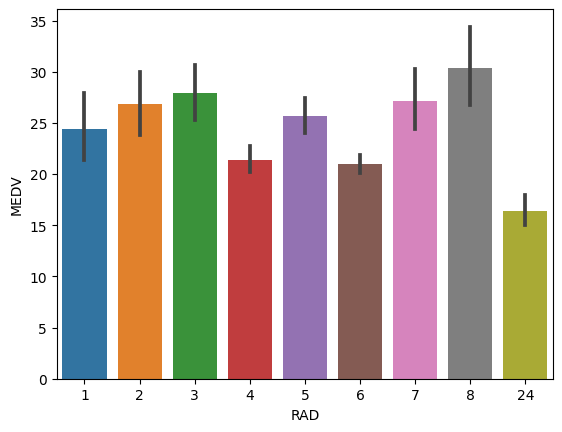

In [35]:
sns.barplot(x='RAD', y='MEDV', data=df)
plt.xlabel('RAD')
plt.ylabel('MEDV')

In [36]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57679112.0000 - mae: 7406.5835  
Mean squared error on test data:  60283492.0
Mean absolute error on test data:  7557.30859375
